<a href="https://colab.research.google.com/github/Roopg/Mixup_technique/blob/main/Mixup_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a demonstration of the mixup technique proposed by facebook AI research in the paper cited below-

  @article{
  zhang2018mixup,
  title={mixup: Beyond Empirical Risk Minimization},
  author={Hongyi Zhang, Moustapha Cisse, Yann N. Dauphin, David Lopez-Paz},
  journal={International Conference on Learning Representations},
  year={2018},
  url={https://openreview.net/forum?id=r1Ddp1-Rb},
  }


# Defining the necessary modules and libraries

In [ ]:
import numpy as np # for array and linear algebra operations
import requests # to send HTTP/1.1 requests 
from PIL import Image # Pillow- an image processing library
import io #for dealing with various types of I/O

## Definining the mixup function

A data augmentation technique involving random convex combination of raw inputs, and correspondingly, convex combination of one-hot label encodings.

In [ ]:
def fetch_img(url):
    response = requests.get(url)
    img_in = Image.open(io.BytesIO(response.content))
    return np.array(img_in)

img1_url = "https://images.unsplash.com/photo-1652794120897-e71a6634eef2?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=60&raw_url=true&ixid=MnwxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHw4fHx8ZW58MHx8fHw%3D&auto=format&fit=crop&w=800"
img2_url = "https://images.unsplash.com/photo-1652836467838-da0827dec1ad?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=60&raw_url=true&ixid=MnwxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwzMHx8fGVufDB8fHx8&auto=format&fit=crop&w=800"

img1 = fetch_img(img1_url)
img2 = fetch_img(img2_url)

In [ ]:
img1.shape, img2.shape
## Resizing the img2 to img1 size

newsize = (533,800,3)
img1 = np.resize(img1,newsize)
img2 = np.resize(img2,newsize)


Text(0.5, 0.98, 'Original Images before mixup')

<Figure size 2160x1584 with 0 Axes>

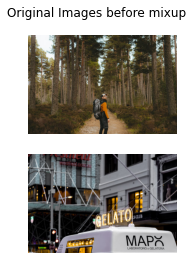

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (30,22))
f, ax = plt.subplots(2)

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].axis('off')
ax[1].axis('off')
plt.suptitle("Original Images before mixup")

# Defining the MixUp funtion 

In [ ]:
def mixup(x1, x2, y1, y2, lambda_=0.5):
    x = lambda_ * x1 + (1 - lambda_) * x2
    y = lambda_ * y1 + (1 - lambda_) * y2
    return x, y

x, y = mixup(img1, img2, np.array([1, 0]), np.array([0, 1]))

## Visualizing the mixup results

(<matplotlib.image.AxesImage at 0x7fecdf5773d0>, array([0.5, 0.5]))

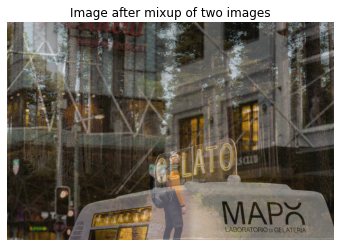

In [ ]:
plt.axis('off')
plt.title("Image after mixup of two images")
plt.imshow(x.astype(int)), y

We see the result of mixup above. As per experiments conducted in the research by Zhang et al (cited above) the mixup technique has been quite effective in improving model generalization and minimize memorization of corrupt labels, reduce sensitivity to adversarial examples, and combat instability in adversarial training.